# CNN MNIST Dataset com TensorFlow 2.0
# Reconhecimento de Escrita

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [29]:
tf.__version__

'2.0.0-beta1'

## Dividir os dados em teste e treino

In [9]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [10]:
# 60000 imagens de treino com o tamanho 28x28 em preto e branco
train_images = train_images.reshape((60000, 28, 28, 1))

# 10000 imagens de teste com o tamanho 28x28 em preto e branco
test_images = test_images.reshape((10000, 28, 28, 1))

In [11]:
# normaizar os dados para os valores dos pixeis que variam de 0 a 255 passem a estar na escala de 0 a 1.
train_images, test_images = train_images/255, test_images/255 

# Criar o Modelo Convolutional Neural Network

In [12]:
# Convolutional base

model = models.Sequential()
 # input layer
    # imagem 28x28 a preto e branco(1)
    # 32 filtros(ou kernels) de tamanho 3x3
    # Normalmente a uma convolutional layer(Conv2D) segue-se uma Pool layer(MaxPooling2D)
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))

    # filtros(ou kernels) de tamanho 2x2
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))

In [13]:
#add dense layer and softmax layer

    # criar um array flatten de 28x28=6084 valores de pixeis, para não e ter uma matriz
model.add(layers.Flatten())

    # 64 neurons
model.add(layers.Dense(64, activation="relu"))

    # output layer
        # nº de neurons iguais às classes de classificação
        # activation function softmax porque é uma problema de multi-classificação
model.add(layers.Dense(10, activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

As you can see, our (3, 3, 64) outputs were flattened into vectors of shape (576) before going through two Dense layers.

# Compilar e Treinar o Modelo

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# epochs = 1 Os dados só passam uma vez no modelo
model.fit(train_images, train_labels, epochs=1)

W0618 14:42:25.471614 10044 deprecation.py:323] From C:\Users\Bruno\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
60000/60000 [==============================] - 67s 1ms/sample - loss: 0.1519 - accuracy: 0.9535


## Avaliar o Modelo

In [18]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 3s 282us/sample - loss: 0.0587 - accuracy: 0.9800


[0.058677698222221804, 0.98]

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
test_image = np.expand_dims(test_images[200],axis = 0)

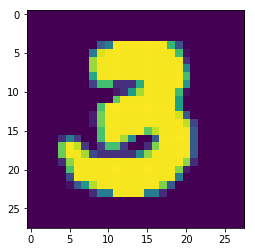

In [36]:
plt.imshow(test_image.reshape(28,28))

In [37]:
result = model.predict(test_image)

In [38]:
# O valor previsto exibido na imagem
result.argmax()

3

## Guardar o Modelo

In [ ]:
# guardar o modelo para o poder utilizar outras vezes sem o ter de treinar
model.save('my_model.h5')

## Fazer previsões com o modelo guardado para um novo conjunto de dados

In [96]:
saveModel = tf.keras.models.load_model("my_model.h5")

### Importar o novo conjunto de dados

In [97]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [98]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [99]:
train_images, test_images = train_images / 255.0, test_images / 255.0

### Previsão para o novo conjunto de dados

In [100]:
test_image = np.expand_dims(test_images[100],axis = 0)

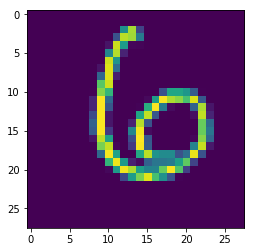

In [101]:
plt.imshow(test_image.reshape(28,28))

In [102]:
result = saveModel.predict(test_image)

In [103]:
# O valor previsto exibido na imagem
result.argmax()

6